In [1]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from nltk.tokenize import word_tokenize
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

In [2]:
from ast import literal_eval
train = pd.read_csv('train_nlp_0123.csv', encoding='utf-8', converters={'clean_body': literal_eval})
test = pd.read_csv('test_nlp_0123.csv', encoding='utf-8', converters={'clean_body': literal_eval})

In [3]:
def clean_message(message, perform_stemming = False):
    '''
    Input:
        message: a string containing a message.
    Output:
        messages_cleaned: a list of words containing the processed message. 

    '''
    #Remove Punctuation
    messages_cleaned = re.sub(r'[^\w\s]', '', message)
    
    #Remove Links
    messages_cleaned = re.sub(r'https?://\S+', '', messages_cleaned)
    
    #Lower Case
    messages_cleaned = messages_cleaned.lower()
    
    #Tokenize
    messages_cleaned = word_tokenize(messages_cleaned)
    
    #Remove Stopwords
    stop_words_list = stopwords.words('english')
    for token in messages_cleaned:
        if token in stop_words_list:
            messages_cleaned.remove(token)
    
    #Perform Stemming
    if perform_stemming == True:
        temp = messages_cleaned.copy()
        messages_cleaned.clear()
        for token in temp:
            messages_cleaned.append(PorterStemmer().stem(token))

    return messages_cleaned

In [4]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anushkapatil/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anushkapatil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

##### Models Below

In [5]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [6]:
#importing all the libraries
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
# Function to test models

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def evaluate(test_y, predicted_y):
    
    categories = [0,4,5,6]
    
    cm = confusion_matrix(test_y, predicted_y)
    fp = cm.sum(axis=0) - np.diag(cm) 
    fn = cm.sum(axis=1) - np.diag(cm)
    tp = np.diag(cm)
    tn = cm.sum() - (fp + fn + tp)
    fp = fp.astype(float)
    fn = fn.astype(float)
    tp = tp.astype(float)
    tn = tn.astype(float)
    
    # Precision or positive predictive value
    precision = tp/(tp+fp)
    print('Precision: ', sum(precision)/len(categories))
    
    # Recall
    recall = tp/(tp+fn)
    print('Recall: ', sum(recall)/len(categories))
    
    # F1-Score
    F1_Score = 2*precision*recall/(precision + recall)
    print('F1-Score: ',  sum(F1_Score)/len(categories))
    
    # Sensitivity
    print('Sensitivity: ', sum(recall)/len(categories))
    
    # Specificity
    specificity = tn/(tn+fp)
    print('Specificity: ', sum(specificity)/len(categories))
    
    # Overall accuracy for each class
    accuracy = (tp+tn)/(tp+fp+fn+tn)
    print('Accuracy: ', sum(accuracy)/len(categories))
    
    # Print Confusion Matrix
    cmd = ConfusionMatrixDisplay(cm, display_labels=categories)
    cmd.plot()
    cmd.ax_.set(xlabel='Predicted', ylabel='True')

In [8]:
# Create X_train, X_test, y_train , y_test

X_train = pd.DataFrame(train['clean_body'])
y_train = train['category']

X_test = pd.DataFrame(test['clean_body'])
y_test =test['category']

In [9]:
X_train

,clean_body
0,"[sent, thursday, blocked, mails, hello, collea..."
1,"[wednesday, july, pm, mailbox, almost, importa..."
2,"[opportunity, code, hi, please, add, opportuni..."
3,"[thursday, pm, removal, hello, decommissioned,..."
4,"[sent, monday, timecard, hello, hours, set, au..."
...,...
96521,"[sent, wednesday, july, sensible, information,..."
96522,"[sent, wednesday, july, sensitive, information..."
96523,"[sent, wed, july, sensitive, information, acce..."
96524,"[sent, wednesday, july, sensitive, information..."


# Parametric Models

In [10]:
#importing all the libraries
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
# Create X_train, X_test, y_train , y_test

X_train = pd.DataFrame(train['clean_body'])
y_train = train['category']

X_test = pd.DataFrame(test['clean_body'])
y_test =test['category']

In [12]:
X = pd.concat([X_train, X_test], axis = 0)
X

,clean_body
0,"[sent, thursday, blocked, mails, hello, collea..."
1,"[wednesday, july, pm, mailbox, almost, importa..."
2,"[opportunity, code, hi, please, add, opportuni..."
3,"[thursday, pm, removal, hello, decommissioned,..."
4,"[sent, monday, timecard, hello, hours, set, au..."
...,...
14560,"[question, job, dear, please, message, bellow,..."
14561,"[friday, pm, ad, groups, rename, hello, please..."
14562,"[updated, bandwidth, upgrade, hello, please, k..."
14563,"[wednesday, pm, questions, dear, several, ques..."


In [13]:
#Converting the sentences tokens (words) and calculating idf for every word (idf assigns weight to each word based on their occurences in documents)
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english',min_df=20,sublinear_tf=True)
tfidf_wm = tfidfvectorizer.fit_transform(X['clean_body'].apply(lambda x: ' '.join(x)))
tfidf_tokens = tfidfvectorizer.get_feature_names()
df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),index = [i for i in range(0,len(X))],columns = tfidf_tokens)

In [14]:
#We will now use each word as a feature to predict our target variable (Category)
df_tfidfvect

,10,14,20,24,2d,2nd,30,34,35,50,...,yes,yesterday,yield,yr,zephyr,zero,zip,zona,zone,zones
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111086,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
X_train = df_tfidfvect[:len(X_train)]
X_test = df_tfidfvect[len(X_train):]

#### 4. XG Boost

Training accuracy of XGB: 85.05169591612622%
 Test Accuracy of XGB:82.97974596635771%
Overall Model Evaluation:
Precision:  0.7903436583952761
Recall:  0.6712496293843866
F1-Score:  0.7120643449667594
Sensitivity:  0.6712496293843866
Specificity:  0.9082453385913385
Accuracy:  0.9148987298317885


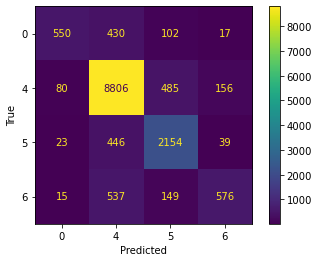

In [17]:
# XG boost
xgb_clf = XGBClassifier(use_label_encoder=False)
#Fitting the model
xgb_clf.fit(X_train, y_train)
#predicting target variable for train and test data
y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)
#Finding train and test accuracy
accuracy1=accuracy_score(y_train, y_train_pred)
accuracy2=accuracy_score(y_test, y_test_pred)
print("Training accuracy of XGB: {}%\n Test Accuracy of XGB:{}%".format(accuracy1*100,accuracy2*100))
print('Overall Model Evaluation:')
evaluate(y_test_pred, y_test)